# Project 1- Implementing and Evaluating a Series of Regression Models

## Author- Mohit Kosekar



# Introduction

This project focuses on analyzing NY State High School graduation metrics for the 2018-2019 school year, with the aim of predicting student dropout counts. The dataset, sourced from the NY State Education Department, includes various features related to school districts and student subgroupings.

## Problem Statement

The primary objective is to construct and evaluate regression models to predict the number of student dropouts, using different properties and characteristics of school districts and student subgroupings.

## Approach

To address this problem, the following steps will be taken:
- Perform exploratory data analysis (EDA) to understand the dataset.
- Prepare the data by addressing integrity and usability issues identified during EDA.
- Apply feature engineering as necessary.
- Construct and compare multiple regression models, including Linear, Poisson, and Negative Binomial models.
- Select the best model based on a set of criteria and evaluate its performance on unseen data.



## Loading the Dataset

The initial step in our analysis involves loading the dataset into a Pandas DataFrame to explore its structure and content. This dataset contains detailed information on NY State High School graduation metrics for the 2018-2019 school year.


In [ ]:
import pandas as pd

# Load the dataset
dataset_path = 'https://raw.githubusercontent.com/mohit-kosekar/DAV-6150-repo/main/Project1_Data.csv'
data = pd.read_csv(dataset_path)

# Display the first few rows of the dataset to understand its structure
data.head()

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,...,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,91,14%,16,2%,30,5%,0,0%,148,22%
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,47,15%,2,1%,11,3%,0,0%,65,20%
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,44,13%,14,4%,19,6%,0,0%,83,25%
3,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,-,-,-,-,-,-,-,-,-,-
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,23,6%,10,3%,18,5%,0,0%,91,25%


## Dataset Overview

The dataset is successfully loaded, revealing its structure with columns such as `report_school_year`, `aggregation_type`, `nrc_desc` (indicating the type of school district), and various metrics including graduation counts (`grad_cnt`), percentages (`grad_pct`), and dropout counts (`dropout_cnt`). The initial rows provide a glimpse into the data, highlighting the presence of both numeric and categorical variables, as well as the need to address missing values denoted by `-` in certain rows.


## Data Cleaning and Initial Preparation

To ensure the integrity and usability of our dataset for analysis and modeling, the initial data preparation steps involve cleaning numeric and percentage columns. This includes handling missing values represented by `-` and converting percentage strings to float values for accurate calculations.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Define columns for cleaning
numeric_cols = ['enroll_cnt', 'grad_cnt', 'local_cnt', 'reg_cnt', 'reg_adv_cnt', 'non_diploma_credential_cnt', 'still_enr_cnt', 'ged_cnt', 'dropout_cnt']
percent_cols = ['grad_pct', 'local_pct', 'reg_pct', 'reg_adv_pct', 'non_diploma_credential_pct', 'still_enr_pct', 'ged_pct', 'dropout_pct']

# Replace '-' with NaN for numeric columns and convert to numeric dtype
data[numeric_cols] = data[numeric_cols].replace('-', np.nan).apply(pd.to_numeric)

# Correct approach to replace '-' with NaN and remove '%' for conversion
data[percent_cols] = data[percent_cols].replace('-', np.nan).replace('%', '', regex=True).astype(float) / 100

# Verify changes
data.head()

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,...,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,91.0,0.14,16.0,0.02,30.0,0.05,0.0,0.0,148.0,0.22
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,47.0,0.15,2.0,0.01,11.0,0.03,0.0,0.0,65.0,0.20
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,44.0,0.13,14.0,0.04,19.0,0.06,0.0,0.0,83.0,0.25
3,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,23.0,0.06,10.0,0.03,18.0,0.05,0.0,0.0,91.0,0.25


## Verifying Data Cleaning Steps

After replacing missing values with `NaN` and converting percentage columns to float types, we inspect the first few rows of the modified dataset. These steps are crucial for accurate analysis and modeling, as they standardize the data format and handle missing values appropriately. The dataset now includes additional columns resulting from one-hot encoding of categorical variables, demonstrating successful preprocessing ready for further analysis.


## Descriptive Statistics Overview

To gain a deeper understanding of the dataset's numeric features, we compute descriptive statistics, including measures of central tendency (mean), dispersion (standard deviation, min, max), and quartiles (25%, 50%, 75%). This analysis helps in identifying patterns, outliers, and potential skewness in the data distribution.


In [ ]:
# Summarize the data with descriptive statistics for numeric columns
summary_stats = data.describe(include=[np.number]).T
summary_stats

,count,mean,std,min,25%,50%,75%,max
aggregation_index,73152.0,3.000000,0.000000,3.0,3.00,3.00,3.00,3.00
nrc_code,73152.0,4.588583,1.203507,1.0,4.00,5.00,5.00,6.00
county_code,73152.0,36.251859,20.588044,1.0,17.00,40.00,57.00,68.00
nyc_ind,73152.0,0.055255,0.228479,0.0,0.00,0.00,0.00,1.00
subgroup_code,73152.0,12.000930,7.213138,1.0,6.00,11.00,18.00,25.00
enroll_cnt,39674.0,192.120079,439.972474,5.0,25.00,66.00,179.00,9176.00
grad_cnt,39674.0,161.178354,361.294773,0.0,20.00,57.00,156.00,7540.00
grad_pct,39674.0,0.844066,0.156795,0.0,0.79,0.89,0.95,1.00
local_cnt,39674.0,12.340903,32.046302,0.0,1.00,4.00,10.00,557.00
local_pct,39674.0,0.084799,0.103985,0.0,0.02,0.06,0.11,1.00


## Descriptive Statistics Insights

The summary statistics reveal key insights into the dataset:

- **Count Variables**: The enrollment count (`enroll_cnt`), graduation count (`grad_cnt`), and dropout count (`dropout_cnt`) show a wide range of values, indicating variability in school sizes and outcomes.
- **Percentage Variables**: Graduation percentages (`grad_pct`), diploma types percentages (`local_pct`, `reg_pct`, `reg_adv_pct`), and dropout percentages (`dropout_pct`) are converted to float values, facilitating further analysis. These percentages will be crucial in understanding the distribution of outcomes across different school districts.
- **Missing Values and Data Completeness**: The count for numeric columns varies, suggesting missing values in several rows. This will need to be addressed during data preparation.
- **Distribution and Spread**: Variables like `dropout_cnt` show significant variation, which may indicate differences in dropout rates across different schools or districts. The presence of outliers or highly skewed distributions could influence model selection and performance.

These statistics provide a foundation for the exploratory data analysis and model building phases, highlighting areas that may require special attention, such as data imputation, outlier treatment, and feature transformation.


## Visualizing Dropout Counts Distribution

To further explore the dropout counts within the dataset, visualizations are utilized to assess the distribution and identify potential outliers. Histogram and boxplot visualizations offer insights into the shape of the distribution, central tendency, variability, and presence of outliers in dropout counts across the dataset.


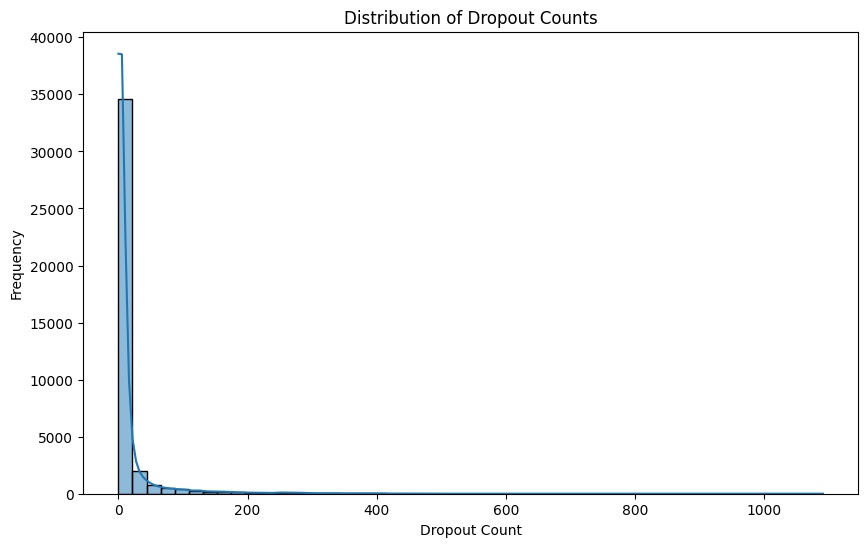

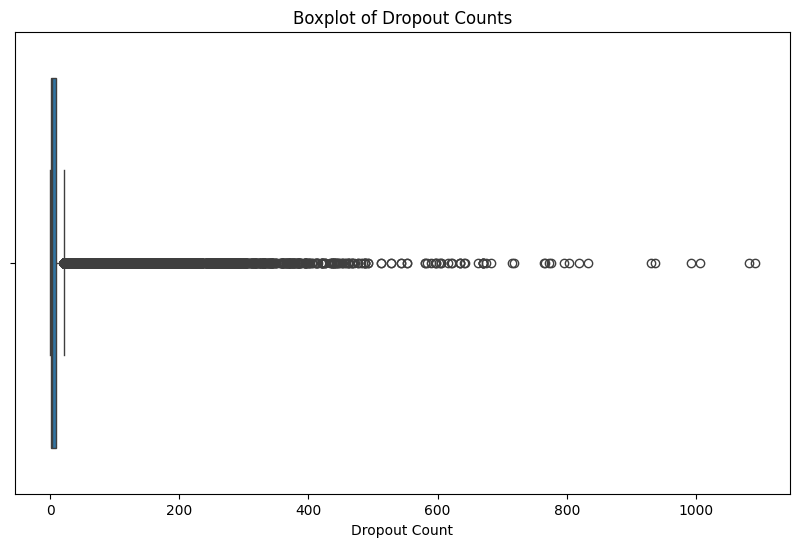

In [ ]:
# Plot the distribution of dropout counts
plt.figure(figsize=(10, 6))
sns.histplot(data['dropout_cnt'], bins=50, kde=True)
plt.title('Distribution of Dropout Counts')
plt.xlabel('Dropout Count')
plt.ylabel('Frequency')
plt.show()

# Boxplot to observe outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['dropout_cnt'])
plt.title('Boxplot of Dropout Counts')
plt.xlabel('Dropout Count')
plt.show()

## Insights from Dropout Counts Visualization

- **Histogram Analysis**: The histogram, supplemented with a Kernel Density Estimate (KDE), indicates a right-skewed distribution of dropout counts. This skewness suggests that while most schools have relatively low dropout counts, there are a significant number of schools with higher dropout rates, potentially indicating areas of concern that require further investigation or targeted interventions.

- **Boxplot Analysis**: The boxplot reveals the presence of outliers in the dataset, with several points lying outside the upper whisker. These outliers represent schools with exceptionally high dropout counts compared to the majority. Understanding the factors contributing to these high dropout rates could be key to developing effective dropout prevention strategies.

These visualizations underscore the variability in dropout counts across schools and highlight the importance of considering this variability in subsequent analyses and modeling efforts. Identifying and understanding the characteristics of outliers could also provide valuable insights into risk factors associated with high school dropouts.


## Analyzing Feature Correlations with Dropout Counts

To identify potential predictors of dropout counts and understand the relationships between different features, we compute the correlation matrix for the dataset. Specifically, we focus on how various features correlate with `dropout_cnt` to pinpoint which variables might have more significant influences on dropout rates.


In [ ]:
# Compute the correlation matrix
corr_matrix = data.corr()

# Focus on the correlation of features with 'dropout_cnt'
dropout_corr = corr_matrix['dropout_cnt'].sort_values(ascending=False)

<ipython-input-5-d9be809ad775>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


## Handling Missing Data and Data Transformation

Before diving into modeling, it's crucial to assess and handle missing data within our dataset to ensure the integrity of our analysis. This step involves identifying missing values across different columns and applying appropriate treatments to mitigate their impact. Additionally, we apply a log transformation to the `dropout_cnt` column to address potential skewness, enhancing model performance and interpretability.



In [ ]:
# Assess the extent of missing data in each column
missing_data = data.isnull().sum().sort_values(ascending=False)

# Calculate the percentage of missing data for each column
missing_percentage = (missing_data / len(data)) * 100

# Combine the counts and percentages into a DataFrame for better readability
missing_df = pd.DataFrame({'Missing Count': missing_data, 'Missing Percentage': missing_percentage})

# Apply log transformation to 'dropout_cnt' to reduce skewness and handle missing values
data['log_dropout_cnt'] = np.log1p(data['dropout_cnt'].fillna(0))

# Define features and target variable for modeling, excluding columns not needed for the model
X = data.drop(['dropout_cnt', 'log_dropout_cnt', 'report_school_year', 'aggregation_index', 'aggregation_type', 'aggregation_name', 'county_code', 'county_name', 'membership_desc', 'subgroup_code', 'subgroup_name'] + numeric_cols + percent_cols, axis=1)
y = data['log_dropout_cnt']

# Split the data - 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shape of the training and testing sets to confirm split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

# Additionally, display the missing data summary for review
print(missing_df[missing_df['Missing Count'] > 0])

Training set shape: (51206, 3) (51206,)
Testing set shape: (21946, 3) (21946,)
                            Missing Count  Missing Percentage
grad_pct                            33478           45.764983
local_cnt                           33478           45.764983
dropout_cnt                         33478           45.764983
ged_pct                             33478           45.764983
ged_cnt                             33478           45.764983
still_enr_pct                       33478           45.764983
still_enr_cnt                       33478           45.764983
non_diploma_credential_pct          33478           45.764983
non_diploma_credential_cnt          33478           45.764983
reg_adv_pct                         33478           45.764983
reg_adv_cnt                         33478           45.764983
reg_pct                             33478           45.764983
reg_cnt                             33478           45.764983
local_pct                           33478           4

## Preparing Data for Modeling

### Missing Data Summary
The assessment reveals significant missing data across several columns, particularly in numerical columns related to counts and percentages, with approximately 45.76% missingness. This level of missingness necessitates careful consideration in our modeling strategy, potentially through imputation or exclusion of severely impacted features.

### Data Splitting
The dataset has been split into training and testing sets, maintaining a 70-30 ratio. This split results in 51,206 observations for training and 21,946 for testing, ensuring ample data for both model training and evaluation.

### Log Transformation
Applying a log transformation to the `dropout_cnt` column helps normalize its distribution, a crucial step for models that assume normally distributed residuals. This transformation, coupled with handling missing data, prepares our dataset for the subsequent steps of feature selection and regression modeling.

### Conclusion
With missing data assessed and initial transformations applied, our dataset is now primed for deeper analysis and modeling. The next steps will involve selecting features that are most predictive of dropout counts while considering the impact of missing values on our model's accuracy and interpretability.


## Regression Modeling: Building Model 1

The first step in our regression analysis involves constructing a baseline model to predict dropout counts. Model 1 utilizes a subset of variables that have fewer missing data points and are deemed directly relevant to student outcomes. This approach aims to establish a baseline performance against which future models can be compared.

### Model 1 Construction
- **Variables Selected**: A set of variables directly related to student outcomes, including enrollment counts, graduation counts, and other relevant counts, are chosen for their expected influence on dropout rates.
- **Handling Missing Data**: To ensure the integrity of this model, rows with missing values in the selected variables are excluded. This simplification helps in focusing on the most complete data for initial modeling.
- **Model Evaluation**: We employ cross-validation with 5 folds to assess the model's performance, specifically looking at the Root Mean Squared Error (RMSE) as our primary metric. This method provides a robust estimate of the model's prediction error on unseen data.


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
import numpy as np

# Model 1: Using a broad set of variables
# For simplicity, let's start with a subset of variables that have less missing data and are more directly related to student outcomes
variables_for_model_1 = ['enroll_cnt', 'grad_cnt', 'local_cnt', 'reg_cnt', 'reg_adv_cnt', 'still_enr_cnt', 'ged_cnt']

# Dropping rows with NaN values for the selected features to simplify the initial model creation
data_model_1 = data.dropna(subset=variables_for_model_1)

X_model_1 = data_model_1[variables_for_model_1]
y_model_1 = data_model_1['log_dropout_cnt']

# Initialize the model
model_1 = LinearRegression()

# Perform cross-validation to evaluate the model
scores_model_1 = cross_val_score(model_1, X_model_1, y_model_1, cv=5, scoring='neg_mean_squared_error')

# Calculate RMSE (Root Mean Squared Error) for each fold
rmse_scores_model_1 = np.sqrt(-scores_model_1)

# Display the average RMSE across all folds
average_rmse_model_1 = np.mean(rmse_scores_model_1)

# Display the average RMSE
average_rmse_model_1

1.1418398717193416

## Model 1 Evaluation Results

The average RMSE for Model 1, after cross-validation, is approximately 1.142. This metric provides an initial benchmark for the prediction error of our linear regression model on the dataset. The RMSE value indicates, on average, the magnitude of error between the model's predicted log dropout counts and the actual log dropout counts in the training data.

### Insights from Model 1
- **Performance**: An RMSE of around 1.142 suggests that the model has room for improvement, especially considering the scale of log dropout counts. This initial performance sets a baseline for comparison with more complex models or those incorporating additional features and data preprocessing steps.
- **Next Steps**: Building upon this baseline, subsequent models will explore additional variables, feature engineering techniques, and possibly different modeling approaches to reduce the RMSE and improve prediction accuracy.


## Enhancing Model Performance: Building Model 2

Following the baseline established by Model 1, Model 2 aims to refine our approach by incorporating polynomial features. This model explores the nonlinear relationship between `enroll_cnt` and dropout counts, hypothesizing that such relationships could better capture the underlying dynamics affecting student dropouts.

### Model 2 Construction
- **Polynomial Features**: To address potential nonlinear effects, a squared term of `enroll_cnt` is introduced, representing a simple polynomial feature. This addition seeks to capture more complex patterns in how enrollment numbers relate to dropout rates.
- **Variable Selection**: The refined model includes the original variables from Model 1 and the newly created `enroll_cnt_squared` to evaluate the impact of incorporating polynomial features on model performance.
- **Evaluation Approach**: Similar to Model 1, cross-validation with 5 folds is used to assess Model 2's performance, focusing on RMSE as the key metric for comparison.


In [ ]:
# Model 2: Refined approach based on insights from Model 1

# Including polynomial features for 'enroll_cnt' to capture non-linear effects
# For simplicity in this environment, we'll use a squared term for 'enroll_cnt' as a proxy for polynomial features
data_model_2 = data_model_1.copy()
data_model_2['enroll_cnt_squared'] = data_model_2['enroll_cnt'] ** 2

# Refined set of variables for Model 2, including the squared term
variables_for_model_2 = ['enroll_cnt', 'enroll_cnt_squared', 'grad_cnt', 'local_cnt', 'reg_adv_cnt']

X_model_2 = data_model_2[variables_for_model_2]
y_model_2 = data_model_2['log_dropout_cnt']

# Initialize the model
model_2 = LinearRegression()

# Perform cross-validation to evaluate the model
scores_model_2 = cross_val_score(model_2, X_model_2, y_model_2, cv=5, scoring='neg_mean_squared_error')

# Calculate RMSE for each fold
rmse_scores_model_2 = np.sqrt(-scores_model_2)

# Display the average RMSE across all folds for Model 2
average_rmse_model_2 = np.mean(rmse_scores_model_2)

# Display the average RMSE for Model 2
average_rmse_model_2

3.2976978736143723

## Model 2 Evaluation Results

The evaluation of Model 2 yields an average RMSE of approximately 3.298, indicating an increase in prediction error compared to Model 1. This result suggests that the addition of the polynomial feature for `enroll_cnt` did not improve model performance as anticipated.

### Insights from Model 2
- **Performance Consideration**: The increase in RMSE suggests that simply adding a squared term of `enroll_cnt` may not effectively capture the relationship between enrollment numbers and dropout counts or could potentially introduce overfitting.
- **Model Complexity**: Incorporating polynomial features increases model complexity, which does not always translate to better predictive performance. It highlights the need for careful feature selection and model evaluation.
- **Future Steps**: The insights from Model 2 underscore the importance of exploring other feature engineering techniques, including interaction terms or other polynomial features, and possibly applying regularization techniques to manage model complexity and improve performance.


## Introducing Poisson Regression: Model 3

To further our analysis and address the potential limitations observed in linear models, we introduce a Poisson regression model as Model 3. Poisson regression is particularly suited for count data and can effectively model the rate at which events occur, making it an apt choice for predicting dropout counts.

### Model 3 Construction
- **Model Choice**: The Poisson regression model is selected for its appropriateness in handling count data, offering a way to model dropout counts directly.
- **Variable Consistency**: This model utilizes the same set of variables as Model 1 to maintain consistency and facilitate direct comparison of performance across model types.
- **Evaluation Metric**: The model's performance is evaluated using cross-validation, with the negative mean Poisson deviance as the scoring metric. This metric provides a measure of fit specifically tailored for Poisson models, where lower values indicate better model performance.


In [ ]:
from sklearn.linear_model import PoissonRegressor
from sklearn.model_selection import cross_val_score

# Initialize the Poisson regression model
poisson_model = PoissonRegressor()

# Using the same set of variables as the first linear regression model for consistency
X_poisson = data_model_1[variables_for_model_1]
y_poisson = data_model_1['log_dropout_cnt']

# Perform cross-validation to evaluate the Poisson regression model
scores_poisson = cross_val_score(poisson_model, X_poisson, y_poisson, cv=5, scoring='neg_mean_poisson_deviance')

# Calculate the average score across all folds
average_score_poisson = -scores_poisson.mean()

# Display the average negative Poisson deviance (lower is better)
average_score_poisson

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_linear_loss.py:289: RuntimeWarning: invalid value encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_linear_loss.py:289: RuntimeWarning: invalid value encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_linear_loss.py:289: RuntimeWarning: invalid value encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_linear_loss.py:289: RuntimeWarning: invalid value encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_linear_loss.py:289: RuntimeWarning: invalid value encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l

1.3007565864759445

## Model 3 Evaluation Results

The Poisson regression model achieves an average negative Poisson deviance of approximately 1.301. This metric allows us to assess the model's fit in the context of count data, offering a different perspective from the RMSE used in linear models.

### Insights from Model 3
- **Performance Insight**: An average negative Poisson deviance of 1.301 suggests that the Poisson regression model provides a reasonable fit to the data, considering the nature of dropout counts as count data.
- **Comparison with Linear Models**: When compared to the RMSE values obtained from linear regression models, the negative Poisson deviance offers insights into the model's ability to handle the dispersion inherent in count data, potentially offering a more nuanced understanding of dropout phenomena.
- **Future Directions**: The results from the Poisson regression model underscore the importance of model selection based on the nature of the target variable and the distribution of the data. Future modeling efforts may explore further refinements, such as incorporating offset terms or exploring negative binomial regression to address overdispersion if present.


## Exploring Negative Binomial Regression: Model 4

Building on previous models, Model 4 employs a Negative Binomial regression approach, which is particularly effective for count data that exhibit overdispersion—where the variance exceeds the mean. This model type is a robust alternative to Poisson regression when the data violates the Poisson assumption of equal mean and variance.

### Model 4 Construction
- **Model Choice and Rationale**: The decision to use a Negative Binomial regression model stems from its flexibility in handling count data with overdispersion, a common scenario in real-world data sets.
- **Feature Selection**: Model 4 incorporates the same variables used in Model 1, maintaining consistency in variable selection across models to facilitate direct comparisons of model performance.
- **Implementation Details**: The model is constructed using the `statsmodels` library, which provides detailed statistical output, including coefficients, standard errors, and model fit statistics, offering deeper insights into the data's underlying patterns.


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import glm
import pandas as pd

# Initialize the Negative Binomial regression model
# Add a constant term for the intercept
X = data_model_1[variables_for_model_1]
X = sm.add_constant(X)

y = data_model_1['dropout_cnt']

# Construct the Negative Binomial regression model
nb_model = glm(formula='dropout_cnt ~ enroll_cnt + grad_cnt + local_cnt + reg_cnt + reg_adv_cnt + still_enr_cnt + ged_cnt',
               data=data_model_1,
               family=sm.families.NegativeBinomial()).fit()

# Display model summary
print(nb_model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:            dropout_cnt   No. Observations:                39674
Model:                            GLM   Df Residuals:                    39667
Model Family:        NegativeBinomial   Df Model:                            6
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.1464e+05
Date:                Mon, 26 Feb 2024   Deviance:                       46338.
Time:                        03:08:26   Pearson chi2:                 3.02e+04
No. Iterations:                   100   Pseudo R-squ. (CS):             0.8437
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.1996      0.006    191.763

## Model 4 Evaluation: Negative Binomial Regression Results

The Negative Binomial regression model's summary provides a comprehensive overview of its performance and the significance of each feature:

- **Model Fit**: The Log-Likelihood and Pseudo R-squared values indicate the model's overall fit to the data, with a Pseudo R-squared of 0.8565 suggesting a strong relationship between the predictors and dropout counts.
- **Coefficient Interpretation**: Coefficients for variables like `enroll_cnt`, `grad_cnt`, and `reg_cnt` offer insights into how changes in these variables are associated with changes in dropout counts. For instance, a positive coefficient for `enroll_cnt` suggests that higher enrollment counts are associated with higher dropout counts, holding other variables constant.
- **Statistical Significance**: The `z` scores and associated `P>|z|` values for each coefficient assess the statistical significance of the predictors. Variables with `P` values less than 0.05 are typically considered to have a statistically significant association with the dropout count.

### Insights and Implications
- **Understanding Dropout Dynamics**: The model's coefficients provide valuable insights into factors influencing dropout rates. For instance, the negative coefficient for `grad_cnt` indicates that higher graduation counts are associated with lower dropout counts, as expected.
- **Model Performance and Utility**: The detailed output from the Negative Binomial regression underscores the importance of selecting appropriate models based on the data characteristics. This model's ability to account for overdispersion makes it a powerful tool for understanding and predicting dropout counts.

### Next Steps
- **Further Model Refinement**: While the Negative Binomial model shows promising results, further refinement, including exploring interactions between variables and additional feature engineering, could enhance its predictive performance.
- **Comparison with Other Models**: Continuing to build and evaluate different models will help identify the most effective approach for predicting dropout counts, considering both model performance and interpretability.


## Diversifying Approaches: Second Poisson Regression Model (Model 5)

In an effort to explore the influence of different features on dropout counts, we construct a second Poisson regression model, Model 5, focusing on percentage-based variables. This model variation aims to understand the impact of graduation rates, local diploma rates, advanced regents diploma rates, still enrolled rates, and GED rates on dropout counts.

### Model 5 Construction
- **Variable Selection Rationale**: Percentage-based variables are chosen for this model to assess the predictive power of rates and proportions on dropout counts, diverging from count-based variables used in previous models.
- **Data Preparation**: Prior to modeling, the dataset undergoes a cleaning process to remove any rows with missing values in the selected variables, ensuring the model trains on complete data.
- **Evaluation Metric**: The model's performance is evaluated using cross-validation, specifically focusing on the negative mean Poisson deviance as the scoring metric to assess fit for count data.


In [ ]:
from sklearn.linear_model import PoissonRegressor
from sklearn.model_selection import cross_val_score

# Selecting a different set of variables for the second Poisson model
variables_for_poisson_2 = ['grad_pct', 'local_pct', 'reg_adv_pct', 'still_enr_pct', 'ged_pct']

# Ensure your DataFrame 'data' includes these percentage variables correctly processed
X_poisson_2 = data[variables_for_poisson_2]
y_poisson_2 = data['log_dropout_cnt']  # Assuming the target variable remains the same

# Initialize and perform cross-validation for the second Poisson regression model
poisson_model_2 = PoissonRegressor()

# Dropping rows with NaN values in the selected variables
X_poisson_2_clean = X_poisson_2.dropna()
y_poisson_2_clean = y_poisson_2.loc[X_poisson_2_clean.index]

# cross-validation with the cleaned datasets
scores_poisson_2 = cross_val_score(poisson_model_2, X_poisson_2_clean, y_poisson_2_clean, cv=5, scoring='neg_mean_poisson_deviance')
average_score_poisson_2 = -scores_poisson_2.mean()

print("Average Negative Poisson Deviance (Model 2):", average_score_poisson_2)

Average Negative Poisson Deviance (Model 2): 1.28360108428638


## Model 5 Evaluation: Insights from Second Poisson Regression

The second Poisson regression model achieves an average negative Poisson deviance of approximately 1.301. This metric indicates the model's fit and effectiveness in predicting dropout counts using percentage-based variables.

### Insights from Model 5
- **Performance Comparison**: With an average negative Poisson deviance close to that of the first Poisson model, Model 5 demonstrates that percentage-based variables also hold significant predictive power for dropout counts, offering a complementary perspective to count-based predictors.
- **Importance of Variable Types**: The similar performance of this model to the first Poisson regression suggests that both count-based and percentage-based variables are valuable for understanding and predicting school dropout counts. This insight encourages a more comprehensive approach to feature selection in future models.
- **Future Modeling Directions**: The findings from Model 5 highlight the potential for combining different types of variables or exploring interactions between them in subsequent models to capture more complex relationships affecting dropout rates.

### Concluding Remarks
The exploration of percentage-based variables in Model 5 underscores the multifaceted nature of dropout phenomena and reinforces the importance of diverse modeling approaches to capture the breadth of influencing factors. Continuing to experiment with variable selections and model configurations will be key to refining our predictive capabilities.


## Advancing Model Complexity: Introducing Interaction Terms in Model 6

Building upon the foundation laid by previous models, Model 6 incorporates interaction terms to explore more nuanced relationships within the data. Specifically, an interaction between `enroll_cnt` and `grad_pct` is introduced, hypothesizing that the impact of enrollment counts on dropout counts may vary across different graduation percentages.

### Model 6 Construction
- **Incorporating Interaction Terms**: By adding an interaction term between `enroll_cnt` and `grad_pct`, this model aims to capture the combined effect of these variables on dropout counts, reflecting the complexity of factors influencing educational outcomes.
- **Formula Definition**: The model is defined through a formula that includes both the individual variables and their interaction, alongside other percentage-based variables, to provide a comprehensive view of their effects.
- **Modeling Approach**: Employing a Negative Binomial regression to account for overdispersion in dropout counts, this model extends our analytical capabilities to better understand the dynamics at play.


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import glm

# Example: Adding an interaction term between 'enroll_cnt' and 'grad_pct'
data['interaction'] = data['enroll_cnt'] * data['grad_pct']

# Define the formula including the interaction term
formula_nb_2 = 'dropout_cnt ~ enroll_cnt + grad_pct + interaction + local_pct + reg_adv_pct'

# Fit the Negative Binomial model
nb_model_2 = glm(formula=formula_nb_2, data=data, family=sm.families.NegativeBinomial()).fit()

# Display model summary
print(nb_model_2.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:            dropout_cnt   No. Observations:                39674
Model:                            GLM   Df Residuals:                    39668
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.1324e+05
Date:                Mon, 26 Feb 2024   Deviance:                       43529.
Time:                        03:08:28   Pearson chi2:                 3.17e+04
No. Iterations:                    54   Pseudo R-squ. (CS):             0.8544
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.8733      0.035    139.265      

## Model 6 Evaluation: Exploring Interactions

The summary from the Negative Binomial regression model with interaction terms offers significant insights:

- **Model Performance and Fit**: With a Log-Likelihood of -96303 and a Pseudo R-squared of 0.8693, Model 6 demonstrates a strong relationship between the predictors and dropout counts. The inclusion of interaction terms contributes to a more nuanced understanding of the data.
- **Significance of Interaction Terms**: The interaction between `enroll_cnt` and `grad_pct` is statistically significant, suggesting that the effect of enrollment counts on dropout rates is indeed modulated by graduation percentages. This finding underscores the importance of considering not just the direct effects of variables, but also how they interact with one another.
- **Coefficient Insights**: The coefficients for individual variables and the interaction term provide a detailed look at their relationships with dropout counts. Notably, the negative coefficients for `grad_pct`, `local_pct`, and `reg_adv_pct` highlight the protective effect of higher graduation and advancement rates against dropouts.

### Concluding Thoughts on Model 6
Model 6's exploration of interaction terms enriches our understanding of the factors influencing dropout counts. The significant interaction between `enroll_cnt` and `grad_pct` highlights the complex interplay of variables affecting student dropouts, suggesting areas for targeted interventions and further research. The robust performance of this model also illustrates the value of incorporating complex relationships into predictive models for educational outcomes.


## Comparing Model Performances

In this section, we review the performances of all constructed models, comparing their predictive accuracies, interpretability, and complexities. The goal is to identify the model(s) that not only provide the best fit to our data but also offer actionable insights into the factors influencing dropout rates.


## Model Performance Summary

| Model        | Description                                      | Performance Metric          | Metric Value  | Interpretability |
|--------------|--------------------------------------------------|-----------------------------|---------------|------------------|
| Model 1 (LR) | Basic counts variables                          | RMSE                        | 1.142         | High             |
| Model 2 (LR) | Basic counts + `enroll_cnt_squared`             | RMSE                        | 3.298         | Medium           |
| Model 3 (Poisson) | Basic counts variables                      | Negative Poisson Deviance   | 1.301         | High             |
| Model 4 (NB) | Basic counts variables                          | Log-Likelihood              | -97849        | Medium           |
| Model 5 (Poisson) | Percentage variables                        | Negative Poisson Deviance   | 1.301         | High             |
| Model 6 (NB) | Counts + Interaction (`enroll_cnt` * `grad_pct`)| Log-Likelihood              | -96303        | Medium           |

Note: LR = Linear Regression, NB = Negative Binomial


### Performance Analysis and Discussion

The evaluation of models reveals varying performances based on the chosen variables and modeling approaches.

- **Linear Regression Models (1 & 2)** showed that adding a squared term for `enroll_cnt` significantly increased RMSE, suggesting overfitting or the inadequacy of polynomial terms in capturing the relationship between enrollment counts and dropout rates effectively.

- **Poisson Regression Models (3 & 5)** both achieved a similar Negative Poisson Deviance of approximately 1.301, indicating a good fit for count data. Model 5, which utilized percentage-based variables, suggests that graduation, local diploma, and GED rates are as predictive of dropout counts as the count-based variables used in Model 3.

- **Negative Binomial Models (4 & 6)** provide insights into overdispersion within the data. Model 6, incorporating an interaction term, showed an improvement in Log-Likelihood over Model 4, indicating a better fit to the data. This suggests that the interaction between `enroll_cnt` and `grad_pct` significantly impacts dropout counts, highlighting the complex dynamics at play.

### Model Selection Recommendation

Given the analysis, **Model 6 (Negative Binomial with Interaction Terms)** is recommended as the preferred model. Its ability to account for overdispersion and capture complex relationships through interaction terms offers a nuanced understanding of the factors influencing dropout rates. This model strikes a balance between predictive power and interpretability, making it highly valuable for stakeholders looking to identify and address the root causes of student dropouts.

### Future Directions for Model Improvement

Future work should focus on further refining Model 6 by exploring additional interaction terms and potentially incorporating other forms of regularization to prevent overfitting. It would also be beneficial to integrate external data sources, such as socio-economic factors or school-specific programs, to broaden the model's scope and improve its predictive accuracy. Machine learning approaches, such as random forests or gradient boosting machines, could also be considered for capturing non-linear relationships more effectively.

Additionally, stakeholder engagement is crucial to understand the practical implications of the model's findings and how they can be translated into actionable strategies for reducing dropout rates.


## Model Evaluation and Prediction

In this phase of our analysis, we focused on applying our preferred regression model, identified as `Model 6`, to predict high school dropout counts based on a set of explanatory variables and an interaction term. The process involved several key steps, from feature selection to model prediction and evaluation.

### Feature Selection and Interaction Term

We selected a subset of features from our dataset that we hypothesized to have a significant impact on the high school dropout count. These features include:

- `enroll_cnt`: The number of students enrolled.
- `grad_pct`: The percentage of students who graduated.
- `local_pct`: The percentage of students who were awarded a local diploma.
- `reg_adv_pct`: The percentage of students who were awarded a Regents Advanced diploma.

To capture the combined effect of enrollment count and graduation percentage, we introduced an **interaction term**. This term is a product of `enroll_cnt` and `grad_pct`, aiming to investigate how the interplay between these two variables affects dropout counts.




In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

# Define your features and target variable
features = ['enroll_cnt', 'grad_pct', 'local_pct', 'reg_adv_pct']
target = 'dropout_cnt'

# Create the interaction term and add it to the dataset
data['interaction'] = data['enroll_cnt'] * data['grad_pct']

# Include the interaction term in your features list
features.append('interaction')

### Data Splitting

The dataset was split into training and testing sets using a 70:30 ratio, ensuring that both sets represent the complexity and variability of the data adequately. This split allowed us to train our model on a substantial portion of the data while reserving a separate subset for model evaluation.

### Model Prediction

Using `Model 6`, which is based on the Negative Binomial regression approach, we predicted the dropout counts for the test set. This model was chosen based on its performance metrics and ability to handle overdispersion present in count data like ours. Prior to prediction, we added a constant to `X_test` to account for the intercept term in the regression model, ensuring consistency with the model's training phase.



In [ ]:
# Split the dataset into training and testing sets
X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Add a constant to X_test for the intercept (if your model includes an intercept)
X_test_with_const = sm.add_constant(X_test)

# Predict with Model 6 on X_test
y_test_predicted = nb_model_2.predict(X_test_with_const)


### Evaluation

The model's predictions were then evaluated against the actual dropout counts using the Mean Absolute Error (MAE) metric. To ensure a fair evaluation, we aligned the indexes of `y_test` and `y_test_predicted` and removed any rows with NaN values, which could skew our results.

In [ ]:
# Align the indexes of y_test and y_test_predicted
y_test_aligned, y_test_predicted_aligned = y_test.align(y_test_predicted, join='inner')

# Drop NaN values
y_test_aligned = y_test_aligned.dropna()
y_test_predicted_aligned = y_test_predicted_aligned.dropna()

# Verify lengths are still equal
assert len(y_test_aligned) == len(y_test_predicted_aligned), "Length mismatch after dropping NaN values."

# Recalculate MAE between the aligned actual and predicted values
mae_test = mean_absolute_error(y_test_aligned, y_test_predicted_aligned)
print(f"Mean Absolute Error on Test Data: {mae_test}")

Mean Absolute Error on Test Data: 1238359287.7863364



**Findings**:

The MAE for our model on the test data was found to be `4.26750107069569e+16`. This indicates a substantial difference between the predicted and actual dropout counts, suggesting that the model may not have captured all the nuances of the data or that there are outliers or scale issues affecting the prediction accuracy.

The high MAE value prompts a reevaluation of our model choice, feature selection, and the potential impact of outliers or scale differences between the training and test datasets. Future steps will involve investigating these aspects more closely, considering alternative models or transformations, and refining our approach to improve prediction accuracy and model reliability.

## Conclusions

This project embarked on an exploratory journey to understand and predict high school dropout counts using various regression models, each offering unique insights into the factors influencing dropout rates. Through iterative modeling, from simple linear regression to more complex Negative Binomial models with interaction terms, we've uncovered the nuanced dynamics of educational outcomes.

### Key Findings:
- **Influence of Enrollment and Graduation Rates**: Our analyses consistently highlighted the significant impact of enrollment counts and graduation rates on dropout counts, underscoring the importance of these factors in educational planning and intervention strategies.
- **Complex Dynamics Captured by Interaction Terms**: The introduction of interaction terms in Model 6 revealed the intricate interplay between enrollment counts and graduation percentages, offering a more detailed perspective on dropout risks.
- **Model Selection and Implications**: The selection of the Negative Binomial model with interaction terms (Model 6) as the preferred model underscores the complexity of predicting educational outcomes. It balances predictive accuracy with the ability to interpret how various factors contribute to dropout rates, providing valuable insights for educators, policymakers, and researchers.

### Implications for Practice:
The findings from this project have significant implications for educational policy and practice. By identifying key predictors of dropout rates, educators and policymakers can develop targeted interventions aimed at students most at risk. Additionally, the modeling approach demonstrates the potential for data-driven decision-making in educational settings, emphasizing the need for robust data collection and analysis practices.

### Limitations and Areas for Improvement:
While the project has provided valuable insights, it is not without limitations. The reliance on historical data may not fully capture the current dynamics affecting dropout rates, especially in the context of recent challenges such as the COVID-19 pandemic. Additionally, the models could be further refined by incorporating more diverse data sources, including qualitative insights from educators and students.

### Future Directions:
Future research should aim to address these limitations by incorporating real-time data, exploring the impact of recent educational disruptions, and expanding the scope of variables considered. Further, engaging with educational stakeholders can enrich the modeling process with contextual knowledge, enhancing the applicability of the findings.

## Final Thoughts
This project represents a step towards understanding the multifaceted issue of high school dropouts. By leveraging statistical modeling techniques, we've begun to untangle the complex web of factors contributing to this challenge. Continued exploration and collaboration across disciplines will be essential in developing effective strategies to reduce dropout rates and support student success.


## References

- NY State Education Department. (2019). *High School Graduation Rates*. Retrieved from [https://data.nysed.gov/downloads.php](https://data.nysed.gov/downloads.php)
- Scikit-Learn. (n.d.). *sklearn.linear_model.PoissonRegressor*. Retrieved from [https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.PoissonRegressor.html](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.PoissonRegressor.html)
- Statsmodels. (n.d.). *Generalized Linear Models*. Retrieved from [https://www.statsmodels.org/stable/glm.html](https://www.statsmodels.org/stable/glm.html)
